In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import seaborn as sns
import popoff
# from pop_off_functions import save_figure
import pop_off_plotting as pop
import pop_off_functions as pof
from Session import SessionLite
from linear_model import PoolAcrossSessions, LinearModel, MultiSessionModel
# from utils.utils_funcs import d_prime

/home/tplas/repos/popping-off/popoff/popoff/loadpaths.py
/home/tplas/repos/Vape


# Load data:

In [3]:
msm = MultiSessionModel(remove_targets=False, subsample_sessions=False,
                         remove_toosoon=True)

## label URH and ARM
for ss in msm.sessions.values():
    _ = pop.normalise_raster_data(session=ss, sort_neurons=False, filter_150_stim=False)
    

long post time
long post time
long post time
long post time
long post time
Mouse RL070, run 29  registered no-lick hit. changed to too soon
long post time
long post time
Mouse RL117, run 29  registered no-lick hit. changed to too soon
Mouse RL117, run 29  registered no-lick hit. changed to too soon
long post time
long post time
long post time
Mouse RL116, run 32  registered no-lick hit. changed to too soon
Mouse RL116, run 32  registered no-lick hit. changed to too soon
Mouse RL116, run 32  registered no-lick hit. changed to too soon
long post time
ALERT SESSIONS NOT SUBSAMPLED
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time


# Individual components of Figure 2:

In [4]:
session = msm.sessions[0]
session

instance Mouse J064, run 10 of Session class

In [5]:
(data_use_mat_norm, data_use_mat_norm_s1, data_use_mat_norm_s2, data_spont_mat_norm, ol_neurons_s1, ol_neurons_s2, outcome_arr,
        time_ticks, time_tick_labels, time_axis) = pop.normalise_raster_data(session=session, sorting_method='sum', sort_tt_list=['hit'],
                            sort_neurons=True, filter_150_stim=False)

In [ ]:
fig, ax = plt.subplots(5, 5, figsize=(20, 20))
ind_arr = np.where(session.s2_bool)[0][ol_neurons_s2]#[::-1]
i_plot = 0
tt = 'hit'
for i_row in range(5):
    for i_col in range(5):
        cell_id_exc = ind_arr[i_plot + 0]
        _ = pop.single_cell_plot(session, cell_id=cell_id_exc, tt=[tt], ax=ax[i_row][i_col], plot_title=True, 
                                 plot_indiv=False, plot_total_mean=False, plot_artefact=True,
                                 ylims=(-1, 1),
                                 plot_n_cell_split=(True if tt is not 'prereward' else False))
        ax[i_row][i_col].set_title(cell_id_exc)
        i_plot += 1

In [ ]:
session = msm.sessions[0]

fig, ax = plt.subplots(2, 3, figsize=(10, 7), gridspec_kw={'wspace': 0.3})
cell_id_exc = 163 
cell_id_inh = 446

for i_tt, tt in enumerate(['hit', 'miss', 'prereward']):
    _ = pop.single_cell_plot(session, cell_id=cell_id_exc, tt=[tt], ax=ax[0][i_tt], plot_title=True, 
                             filter_150_stim=True,
                             plot_indiv=False, plot_total_mean=False, 
                             plot_n_cell_split=True)
    _ = pop.single_cell_plot(session, cell_id=cell_id_inh, tt=[tt], ax=ax[1][i_tt], 
                             filter_150_stim=False)


In [ ]:
for n_cells in [[5, 10, 20, 30, 40, 50]]:
    tmp = pop.plot_average_tt_s1_s2(msm, n_cells)


In [ ]:
# pos = pof.get_percent_cells_responding(msm.linear_models[0].session, 's2',
#                                    direction='positive', prereward=False)

# neg = pof.get_percent_cells_responding(msm.linear_models[0].session, 's2',
#                                    direction='negative', prereward=False)
# # 
# np.mean(pos[session.outcome=='cr']) + np.mean(neg[session.outcome=='cr'])

## Run this to find responding cells:

In [ ]:
# Used to set the alpha, should be on average across sesssion 5% of cells responding to cr trials

cr_responders = []
for session_idx in range(len(msm.linear_models)):

    session = msm.linear_models[session_idx].session
    
    n_responders = pof.get_percent_cells_responding(session, 's2', direction='positive', prereward=False)
    cr_positive = np.mean(n_responders[session.outcome=='cr'])
    
    n_responders = pof.get_percent_cells_responding(session, 's2', direction='negative', prereward=False)
    cr_negative = np.mean(n_responders[session.outcome=='cr'])
    
    cr_responders.append(cr_positive + cr_negative)
    
print(f'percentage of cells responding to CR trials is {np.round(np.mean(cr_responders), 2)}')
assert np.mean(cr_responders) < 5, 'more than 5% of cells respond to CR trials'


In [ ]:
perc_hit_dict, perc_miss_dict = {x: {} for x in ['s1', 's2']}, {x: {} for x in ['s1', 's2']}
var_perc_hit_dict, var_perc_miss_dict = {x: {} for x in ['s1', 's2']}, {x: {} for x in ['s1', 's2']}
for reg in ['s1', 's2']:
    for direction in ['positive', 'negative']:
        print(reg, direction)
        tmp = pof.transfer_dict(msm, region=reg, direction=direction)
        perc_hit_dict[reg][direction], perc_miss_dict[reg][direction], var_perc_hit_dict[reg][direction], var_perc_miss_dict[reg][direction] = tmp

## Individual components of figure 2:

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8), gridspec_kw={'wspace': 0.4, 'hspace': 0.4})
bool_wr = True
plot_indiv = True
plot_mean = True
sqrt_weights = False
for i_reg, reg in enumerate(['s1', 's2']):
    for i_dir, direction in enumerate(['positive', 'negative']):
        print('\n')
        print(reg)
        print(direction)
        
        print('hit')
        pop.plot_transfer_function(dict_activ=perc_hit_dict[reg][direction], 
                                   plot_logscale=False, weighted_regression=bool_wr, 
                                   plot_mean_ci=plot_mean,
                                   dict_var=var_perc_hit_dict[reg][direction],
                                   label='hit', ax=ax[i_reg][i_dir], plot_indiv_data=plot_indiv,
                                   verbose=1, sqrt_weights=sqrt_weights)
        
        print('miss')
        pop.plot_transfer_function(dict_activ=perc_miss_dict[reg][direction], 
                                   plot_logscale=False, weighted_regression=bool_wr, 
                                   plot_mean_ci=plot_mean,
                                   dict_var=var_perc_miss_dict[reg][direction],
                                   label='miss', ax=ax[i_reg][i_dir], plot_indiv_data=plot_indiv,
                                   verbose=1, sqrt_weights=sqrt_weights)
        
        pop.plot_spont(msm=msm, region=reg, direction=direction, ax=ax[i_reg][i_dir])
        
        ax[i_reg][i_dir].set_title(f'{reg.upper()} responses')
        if direction == 'positive':
            ax[i_reg][i_dir].set_ylabel('Fraction of cells excited (%)')
        elif direction == 'negative':
            ax[i_reg][i_dir].set_ylabel('Fraction of cells inhibited (%)')
#         if reg == 's1':
#             ax[i_reg][i_dir].set_ylim(0, 15)
#         else:
#             ax[i_reg][i_dir].set_ylim(0, 15)
            
    
## Refs:
# https://towardsdatascience.com/weighted-linear-regression-2ef23b12a6d7
# http://numerical.recipes/book/book.html  (15.2)
#     https://en.wikipedia.org/wiki/Weighted_least_squares
# https://vp.phys.ethz.ch/DataAnalysis/pdf/14Nov2016.pdf
# http://stat.cmu.edu/~cshalizi/350/lectures/18/lecture-18.pdf
# https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.WLS.html


In [ ]:
# perc_hit_dict
fig, ax = plt.subplots(2, 2, figsize=(8, 7), gridspec_kw={'wspace': 0.5, 'hspace': 0.5})

pop.plot_scatter_balance_stim(dict_activ_full=perc_hit_dict, 
                              ax_s1=ax[0][0], ax_s2=ax[0][1], tt='hit')

pop.plot_scatter_balance_stim(dict_activ_full=perc_miss_dict, 
                              ax_s1=ax[1][0], ax_s2=ax[1][1], tt='miss')

for i_row in [0, 1]:
    for i_col in [0, 1]:
        ax[i_row][i_col].set_xlim(0, 22)
        ax[i_row][i_col].set_ylim(0, 22)

# Figure 2:

hit s1
Grand average max value:  0.0383106972949217 pm  0.003875541027206393 at time  0.36666666666666664
---
miss s1
Grand average max value:  0.015454600118250034 pm  0.004233384483738096 at time  0.36666666666666664
---
hit s2
Grand average max value:  0.021502394839475664 pm  0.006359144469370377 at time  0.36666666666666664
---
miss s2
Grand average max value:  0.010499500301299357 pm  0.007158209497685112 at time  0.8
---
s1 0.7819961857503059 1.213437013503843e-16
s2 0.32523035084211693 0.004411799449381961
s1 0.7966631424601642 2.107433947330609e-17
s2 0.49619633951441955 6.9289187923208775e-06


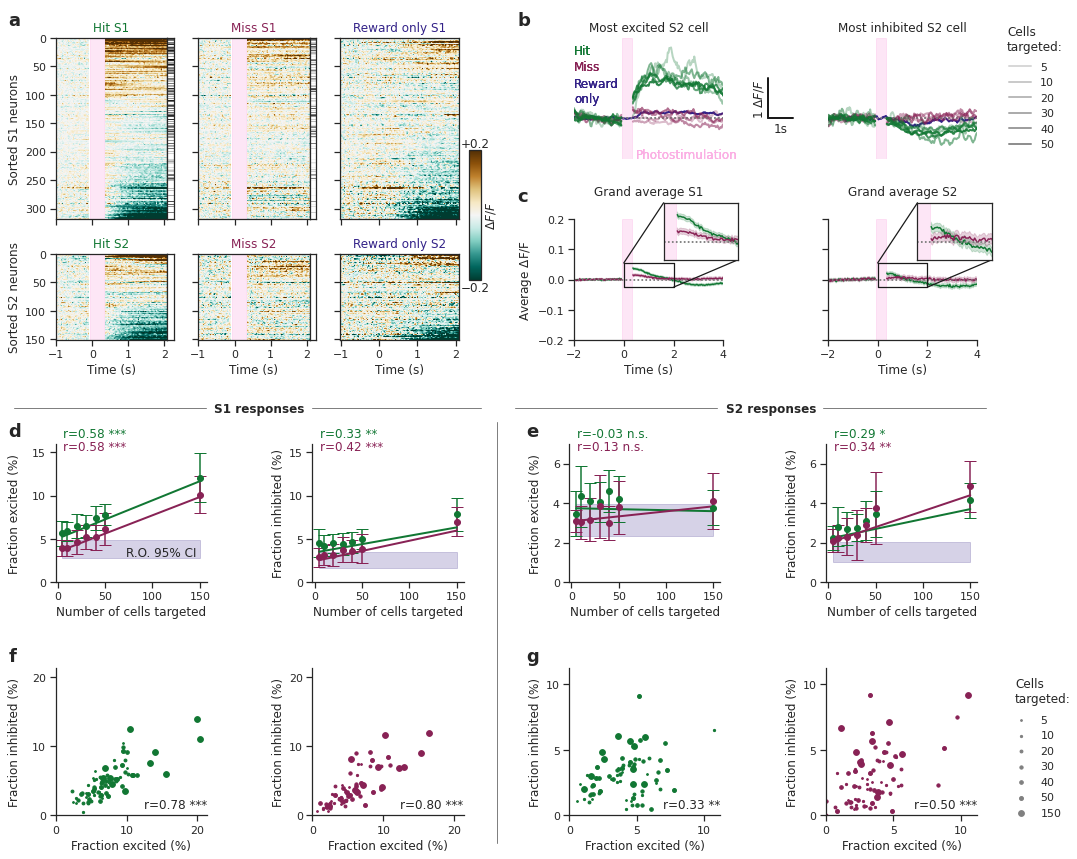

In [47]:
save_fig = False
session = msm.sessions[0]

fig = plt.figure(constrained_layout=False, figsize=(16, 12))

s2_bottom = 0.6
panel_v_space = 0.35
s1_top = s2_bottom + panel_v_space
inter_panel_space = 0.04
net_panel_space = panel_v_space - inter_panel_space
n_cells_s1 = np.sum(session.s1_bool)
n_cells_s2 = np.sum(session.s2_bool)
n_cells_tot = n_cells_s1 + n_cells_s2
s2_space = (n_cells_s2 / n_cells_tot) * net_panel_space 
s2_top = s2_bottom + s2_space
s1_bottom = s2_top + inter_panel_space
            
gs_rasters_top = fig.add_gridspec(ncols=3, nrows=1, bottom=s1_bottom, top=s1_top, right=0.4, left=0.05,
                              wspace=0.2, hspace=0.4)
gs_rasters_bottom = fig.add_gridspec(ncols=3, nrows=1, bottom=s2_bottom, top=s2_top, right=0.4, left=0.05,
                              wspace=0.2, hspace=0.4)


gs_rasters_cbar = fig.add_gridspec(ncols=1, nrows=1, bottom=s2_bottom+0.07, top=s1_top-0.13, right=0.419,
                                   left=0.409, wspace=0.1, hspace=0.1) 

gs_example_cells = fig.add_gridspec(ncols=2, nrows=1, bottom=0.81, top=0.95, right=0.85, left=0.5,
                              wspace=0.7, hspace=0.4)
gs_pop_activity = fig.add_gridspec(ncols=2, nrows=1, bottom=0.6, top=0.74, right=0.85, left=0.5,
                              wspace=0.7, hspace=0.4)
gs_transfer = fig.add_gridspec(ncols=4, nrows=1, bottom=0.32, top=0.48, right=0.85, left=0.05,
                              wspace=0.7, hspace=0.4)
gs_balance = fig.add_gridspec(ncols=4, nrows=1, bottom=0.05, top=0.22, right=0.85, left=0.05,
                              wspace=0.7, hspace=0.4)

bool_filter_150 = True  # if true, do not use 150 cells stim in panels A-C

## Rasters     
ax_raster = {}
for i_reg, reg in enumerate(['s1', 's2']):
    ax_raster[reg] = {}
    for i_x, xx in enumerate(['hit', 'miss', 'spont']):
        if reg == 's1':
            ax_raster[reg][xx] = fig.add_subplot(gs_rasters_top[i_x])
        else:
            ax_raster[reg][xx] = fig.add_subplot(gs_rasters_bottom[i_x])
cax_raster = fig.add_subplot(gs_rasters_cbar[0])
pop.plot_raster_plots_input_trial_types_one_session(session=session, ax_dict=ax_raster, cax=cax_raster,
                                                    cbar_pad=0.15,
                                        filter_150_stim=bool_filter_150, imshow_interpolation='bilinear',
                                          sort_tt_list=['hit', 'miss', 'spont'], sorting_method='sum')
for i_reg, reg in enumerate(['s1', 's2']):
    for i_x, xx in enumerate(['hit', 'miss', 'spont']):
        if xx != 'hit':
            ax_raster[reg][xx].set_ylabel('')
        if reg == 's1':
            ax_raster[reg][xx].set_xlabel('')
            
## Example cells
cell_id_exc = 163 
cell_id_inh = 446
ax_example_cell = {xx: fig.add_subplot(gs_example_cells[xx]) for xx in range(2)}
for i_tt, tt in enumerate(['prereward', 'miss', 'hit']):
    _ = pop.single_cell_plot(session, cell_id=cell_id_exc, tt=[tt], ax=ax_example_cell[0], 
                             plot_title=False, plot_indiv=False, plot_total_mean=False, 
                             plot_n_cell_split=True, filter_150_stim=bool_filter_150, #ylims=(-2, 2),
                             smooth_traces=True, plot_artefact=(tt == 'hit'),
                             plot_tt_descr=True)
    _ = pop.single_cell_plot(session, cell_id=cell_id_inh, tt=[tt], ax=ax_example_cell[1], 
                             plot_title=False, plot_indiv=False, plot_total_mean=False, 
                             plot_n_cell_split=True, filter_150_stim=bool_filter_150, #ylims=(-0.7, 0.7),
                             smooth_traces=True, plot_artefact=(tt == 'hit'), 
                             plot_legend_n_cells=(tt == 'hit'))
assert session.s2_bool[cell_id_exc] and session.s2_bool[cell_id_inh]
ax_example_cell[0].set_title('Most excited S2 cell')
ax_example_cell[1].set_title('Most inhibited S2 cell')
leg_example = ax_example_cell[1].get_legend()
for han in leg_example.legendHandles:
    han.set_color('grey')
## Scale bar:
ax_example_cell[0].plot([5.8, 6.8], [0, 0], c='k', linewidth=2, clip_on=False)
ax_example_cell[0].plot([5.8, 5.8], [0, 1], c='k', linewidth=2, clip_on=False)
ax_example_cell[0].text(s='1s', x=6.3, y=-0.35, ha='center')
ax_example_cell[0].text(s='1 ' + r"$\Delta F/F$", x=5.15, y=0.5, rotation=90, va='center')    
    
## Population activity
ax_pop_activity = {xx: fig.add_subplot(gs_pop_activity[xx]) for xx in range(2)}
if bool_filter_150:
    n_cell_list = [[5, 10, 20, 30, 40, 50]]
else:
    n_cell_list = [[5, 10, 20, 30, 40, 50, 150]]
for n_cells in n_cell_list:
    tmp = pop.plot_average_tt_s1_s2(msm, n_cells, #ylims=(-0.2, 0.2),
                                   ax_s1=ax_pop_activity[0], ax_s2=ax_pop_activity[1])
ax_pop_activity[0].set_title('Grand average S1', y=1.15)
ax_pop_activity[1].set_title('Grand average S2', y=1.15)
    
## Transfer function:
ax_transfer = {xx: fig.add_subplot(gs_transfer[xx]) for xx in range(4)}
i_ax = 0
for i_reg, reg in enumerate(['s1', 's2']):
    for i_dir, direction in enumerate(['positive', 'negative']):
        pop.plot_transfer_function(dict_activ=perc_hit_dict[reg][direction], 
                                   dict_var=var_perc_hit_dict[reg][direction],
                                   plot_logscale=False, indicate_spont_ci=(i_reg == 0 and i_dir ==0),
                                   label='hit', ax=ax_transfer[i_ax], plot_indiv_data=False,
                                   weighted_regression=True)
        
        pop.plot_transfer_function(dict_activ=perc_miss_dict[reg][direction], 
                                   dict_var=var_perc_hit_dict[reg][direction],
                                   plot_logscale=False,
                                   label='miss', ax=ax_transfer[i_ax], plot_indiv_data=False,
                                   weighted_regression=True)
        
        pop.plot_spont(msm=msm, region=reg, direction=direction, ax=ax_transfer[i_ax])
        if direction == 'positive':
            ax_transfer[i_ax].set_ylabel('Fraction excited (%)')
        elif direction == 'negative':
            ax_transfer[i_ax].set_ylabel('Fraction inhibited (%)')
        if reg == 's1':
            ax_transfer[i_ax].set_ylim(0, 16)
        else:
            ax_transfer[i_ax].set_ylim(0, 7)
        i_ax += 1
        
## Balance
ax_balance = {xx: fig.add_subplot(gs_balance[xx]) for xx in range(4)}
pop.plot_scatter_balance_stim(dict_activ_full=perc_hit_dict, plot_legend=False,
                              ax_s1=ax_balance[0], ax_s2=ax_balance[2], tt='hit',
                             verbose=1)
pop.plot_scatter_balance_stim(dict_activ_full=perc_miss_dict, verbose=1,
                              ax_s1=ax_balance[1], ax_s2=ax_balance[3], tt='miss')
pop.equal_lims_two_axs(ax1=ax_balance[0], ax2=ax_balance[1])
pop.equal_lims_two_axs(ax1=ax_balance[2], ax2=ax_balance[3])
for ii in range(2):
    ax_balance[ii].set_xticks([0, 10, 20])
    ax_balance[ii].set_yticks([0, 10, 20])
for ii in range(2, 4):
    ax_balance[ii].set_xticks([0, 5, 10])
    ax_balance[ii].set_yticks([0, 5, 10])
leg_balance = ax_balance[3].get_legend()
for han in leg_balance.legendHandles:
    han.set_color('grey')
    
## aesthetics:
ax_balance[1].plot([26, 26], [-4, 57], clip_on=False, c='grey', linewidth=1)
for (xleft, xright) in [(-42, -15), (0, 23.7), (28.6, 57), (72, 95)]:
    ax_balance[1].plot([xleft, xright], [59.1, 59.1], clip_on=False, c='grey', linewidth=1)
ax_balance[1].annotate('S1 responses', xy=(0.24, 0.52), xycoords='figure fraction',
                       weight='bold', ha='center')
ax_balance[1].annotate('S2 responses', xy=(0.715, 0.52), xycoords='figure fraction',
                       weight='bold', ha='center')

## Align & labels:
for i_ax in range(1, 4):
    fig.align_ylabels(axs=[ax_transfer[i_ax], ax_balance[i_ax]])
fig.align_ylabels(axs=[ax_raster['s1']['hit'], ax_raster['s2']['hit'],  ax_transfer[0], ax_balance[0]])

ax_lab = ax_raster['s1']['hit']
ax_lab.annotate('a', xy=(0.008, 0.97), xycoords='figure fraction', weight='bold', size=18)
ax_lab.annotate('b', xy=(0.48, 0.97), xycoords='figure fraction', weight='bold', size=18)
ax_lab.annotate('c', xy=(0.48, 0.765), xycoords='figure fraction', weight='bold', size=18)
ax_lab.annotate('d', xy=(0.008, 0.492), xycoords='figure fraction', weight='bold', size=18)
ax_lab.annotate('e', xy=(0.488, 0.492), xycoords='figure fraction', weight='bold', size=18)
ax_lab.annotate('f', xy=(0.008, 0.23), xycoords='figure fraction', weight='bold', size=18)
ax_lab.annotate('g', xy=(0.488, 0.23), xycoords='figure fraction', weight='bold', size=18)

if save_fig:
    plt.savefig('/home/tplas/repos/popping-off/figures/full_figs_manuscript/Figure2.pdf',
               bbox_inches='tight')

In [ ]:
dict_interdep_corrs = {}
for reg in ['s1', 's2']:
    dict_interdep_corrs[reg] = pof.interdep_corr_balance(dict_activ_hit=perc_hit_dict, dict_activ_miss=perc_miss_dict, reg=reg)

# print(dict_interdep_corrs)
dict_interdep_corrs

## Raster supp fig:
(Comment/uncomment the 'File -1, File -2 lines at the top to switch between the 2 supp figs)

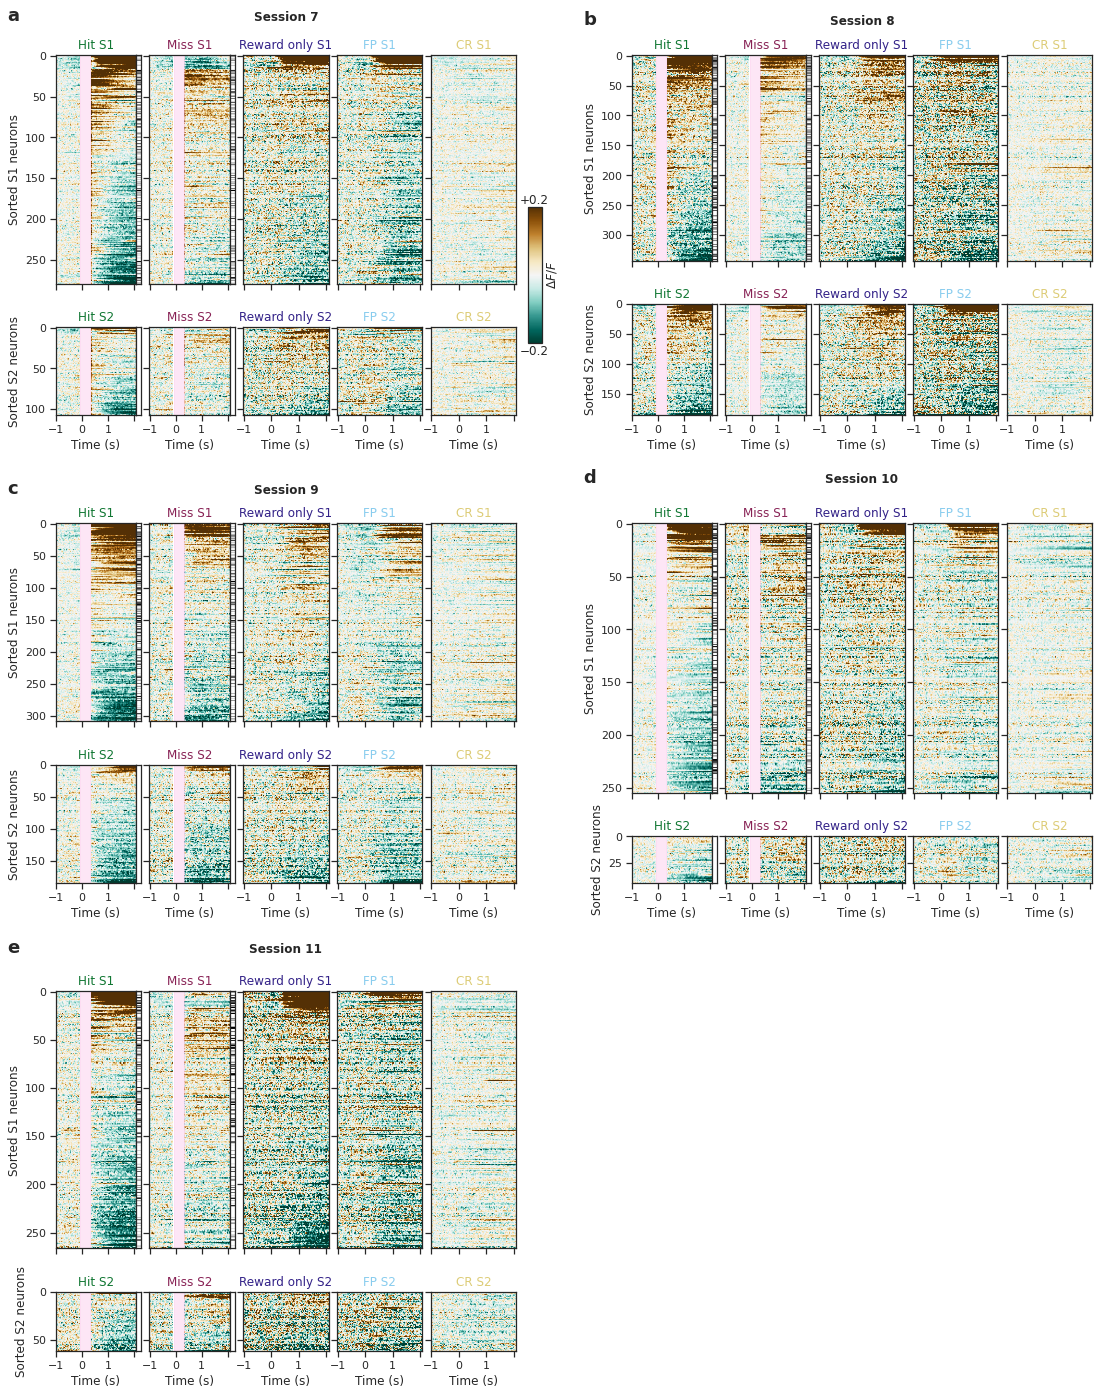

In [49]:
save_fig = False

### Two figs cover 6 and 4 sessions resp.. Select one of two file settings below:

## File -1:
# session_inds = [[0, 1], [2, 3], [4, 5]]
# suffix_file = '-1'

## File -2:
session_inds = [[6, 7], [8, 9], [10]]
suffix_file = '-2'


### Plotting:
fig = plt.figure(constrained_layout=False, figsize=(16, 20))
bool_filter_150 = True  # if true, do not use 150 cells stim in panels A-C
    
ax_raster = {}
gs_rasters_top = {}
gs_rasters_bottom = {}

label_list = ['a', 'b', 'c', 'd', 'e', 'f']

## Rasters    
i_plot = 0
for ilist, list_ss_id in enumerate(session_inds):
    for irow, sess_id in enumerate(list_ss_id):
        session = msm.sessions[sess_id]
        ax_raster[sess_id] = {}
        for i_reg, reg in enumerate(['s1', 's2']):
            ax_raster[sess_id][reg] = {}
            if irow == 0:
                leftcoord = 0.05
                rightcoord = 0.45
            elif irow == 1:
                leftcoord = 0.55
                rightcoord = 0.95
            if ilist == 0:
                s2_bottom = 0.7
            elif ilist == 1:
                s2_bottom = 0.375
            elif ilist == 2:
                s2_bottom = 0.05
            panel_v_space = 0.25
            s1_top = s2_bottom + panel_v_space
#             inter_v_space = 0.075
            inter_panel_space = 0.03
            net_panel_space = panel_v_space - inter_panel_space
            n_cells_s1 = np.sum(session.s1_bool)
            n_cells_s2 = np.sum(session.s2_bool)
            n_cells_tot = n_cells_s1 + n_cells_s2
            s2_space = (n_cells_s2 / n_cells_tot) * net_panel_space 
            s2_top = s2_bottom + s2_space
            s1_bottom = s2_top + inter_panel_space
            if ilist == 0 and irow == 0:
                gs_rasters_cbar = fig.add_gridspec(ncols=1, nrows=1, bottom=s2_bottom+0.05, top=s1_top-0.105, 
                                                   right=rightcoord + 0.022, left=rightcoord + 0.01,
                                                   wspace=0.4, hspace=0.4)
                bool_cb = True
#                 gs_rasters_cbar = fig.add_gridspec(ncols=1, nrows=1, bottom=s2_bottom+0.07, top=s1_top-0.13, right=0.415,
#                                    left=0.405, wspace=0.1, hspace=0.1) 
                cax_raster = fig.add_subplot(gs_rasters_cbar[0])
                pop.naked(cax_raster)
            else:
                bool_cb = False
                cax_raster = None

            
            gs_rasters_top[sess_id] = fig.add_gridspec(ncols=5, nrows=1, bottom=s1_bottom, top=s1_top, 
                                                       right=rightcoord, left=leftcoord,
                                                      wspace=0.1, hspace=0.4)
            gs_rasters_bottom[sess_id] = fig.add_gridspec(ncols=5, nrows=1, bottom=s2_bottom, top=s2_top, 
                                                          right=rightcoord, left=leftcoord,
                                                          wspace=0.1, hspace=0.4)

            for i_x, xx in enumerate(['hit', 'miss', 'spont', 'fp', 'cr']):
                if reg == 's1':
                    ax_raster[sess_id][reg][xx] = fig.add_subplot(gs_rasters_top[sess_id][i_x])
                else:
                    ax_raster[sess_id][reg][xx] = fig.add_subplot(gs_rasters_bottom[sess_id][i_x])
       
        pop.plot_raster_plots_input_trial_types_one_session(session=session, ax_dict=ax_raster[sess_id], cax=cax_raster,
                                                filter_150_stim=bool_filter_150, imshow_interpolation='bilinear',
                                                            bool_cb=bool_cb, #c_lim=1,
                                                  sort_tt_list=['hit', 'miss', 'spont'], sorting_method='sum')
#         if cax_raster is not None:
#             print(cax_raster.get_yticks(), cax_raster.get_yticklabels())
#             cax_raster.set_xticklabels([])
#             cax_raster.set_yticklabels([])
        for i_reg, reg in enumerate(['s1', 's2']):
            for i_x, xx in enumerate(['hit', 'miss', 'spont', 'fp', 'cr']):
                ax_tmp = ax_raster[sess_id][reg][xx]
                if xx != 'hit':
                    ax_tmp.set_ylabel('')
#                     ax_tmp.set_yticklabels(['' for x in ax_tmp.get_yticks()])
                if reg == 's1':
                    ax_tmp.set_xlabel('')
#                     ax_tmp.tick_params(labelbottom=False)
                    if xx == 'hit':
                        ax_tmp.annotate(text=label_list[i_plot], size=18,
                                        weight='bold', xy=(-0.6, 1.15), xycoords='axes fraction')
                    elif xx == 'spont':
                        ax_tmp.annotate(text=pop.translate_session(session),
                                        weight='bold', ha='center', xy=(0.5, 1.15), xycoords='axes fraction')
                else:
                    ax_tmp.set_xticklabels([x.replace("-", u"\u2212") for x in ['-1', '0', '1', '']])
                        
        i_plot += 1
if save_fig:
    if suffix_file == '-1':
        fpath = f'/home/tplas/repos/popping-off/figures/full_figs_manuscript/Supplementary_Figure2.pdf'
    if suffix_file == '-2':
        fpath = f'/home/tplas/repos/popping-off/figures/full_figs_manuscript/Supplementary_Figure3.pdf'
    plt.savefig(fpath, bbox_inches='tight')